In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
from default_constants import *
from ECE_mechanism.plot_voltammogram_ECE import main_CSV_ECE_ox

In [2]:
from ECE_mechanism.plot_voltammogram_ECE import main_LSV_ECE_red
cst_all = default_constants()
cst_all["Ox"] = False
#I_LSV = main_LSV_ECE_red(cst_all)

DM =  0.45 and lambda =  50
Dt =  0.01884955592153876 and T = 2Pi/f =  0.25132741228718347
YOU SHOULD INCREASE THE NUMBER OF TIME STEPS TO GET MEANINGFUL RESULTS !


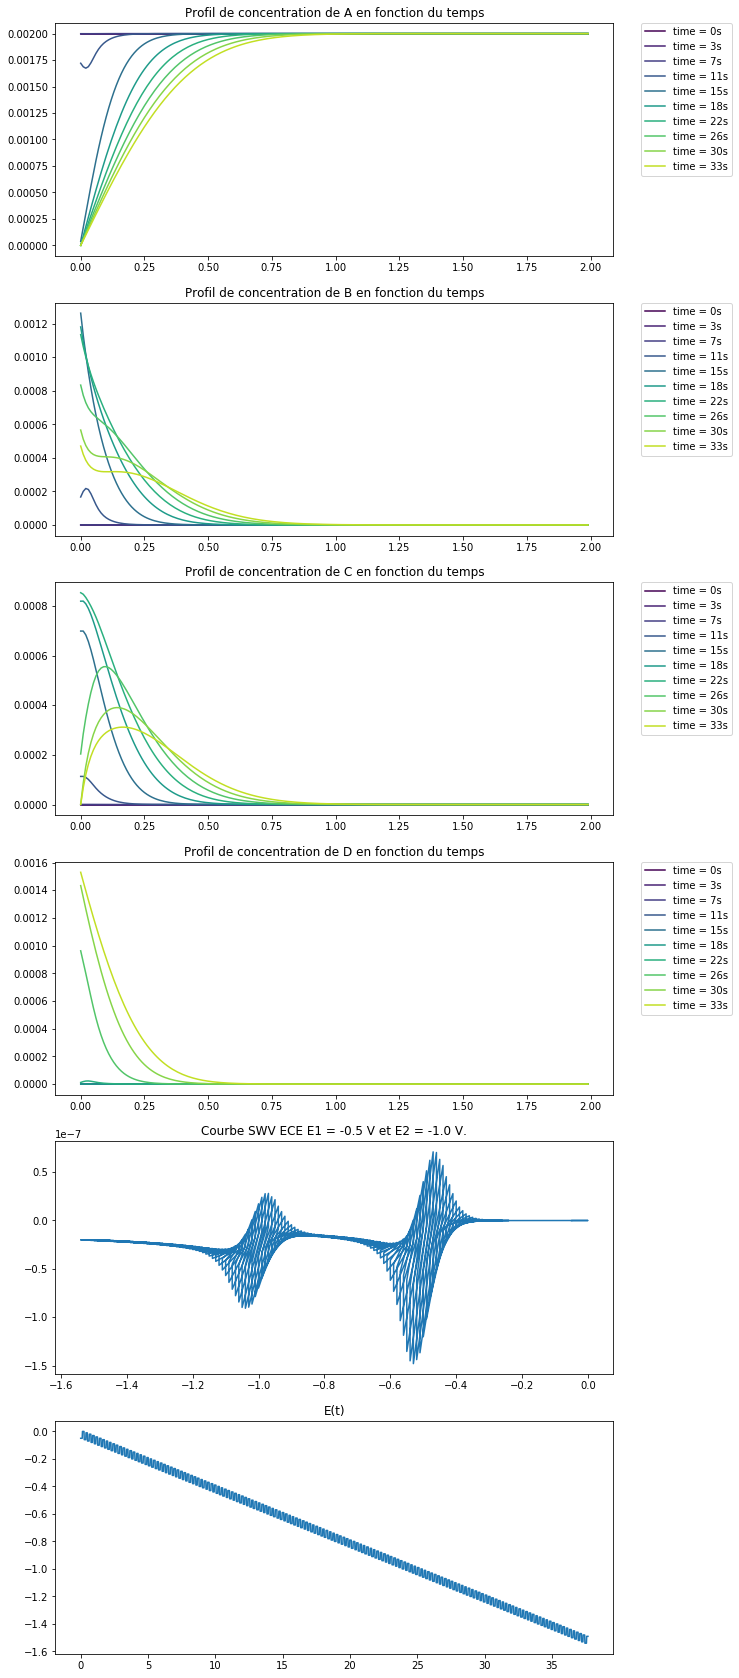

In [5]:
from plot_voltammogram_ECE import main_SWV_ECE_red
cst_all = default_constants()
cst_all["Ox"] = False
I_SWV = main_SWV_ECE_red(cst_all)

In [6]:
from plot_tools import plot_SWV
plot_SWV(cst_all, I_SWV)

NameError: name 'plt' is not defined

In [ ]:
cst_all

DM =  0.45 and lambda =  50


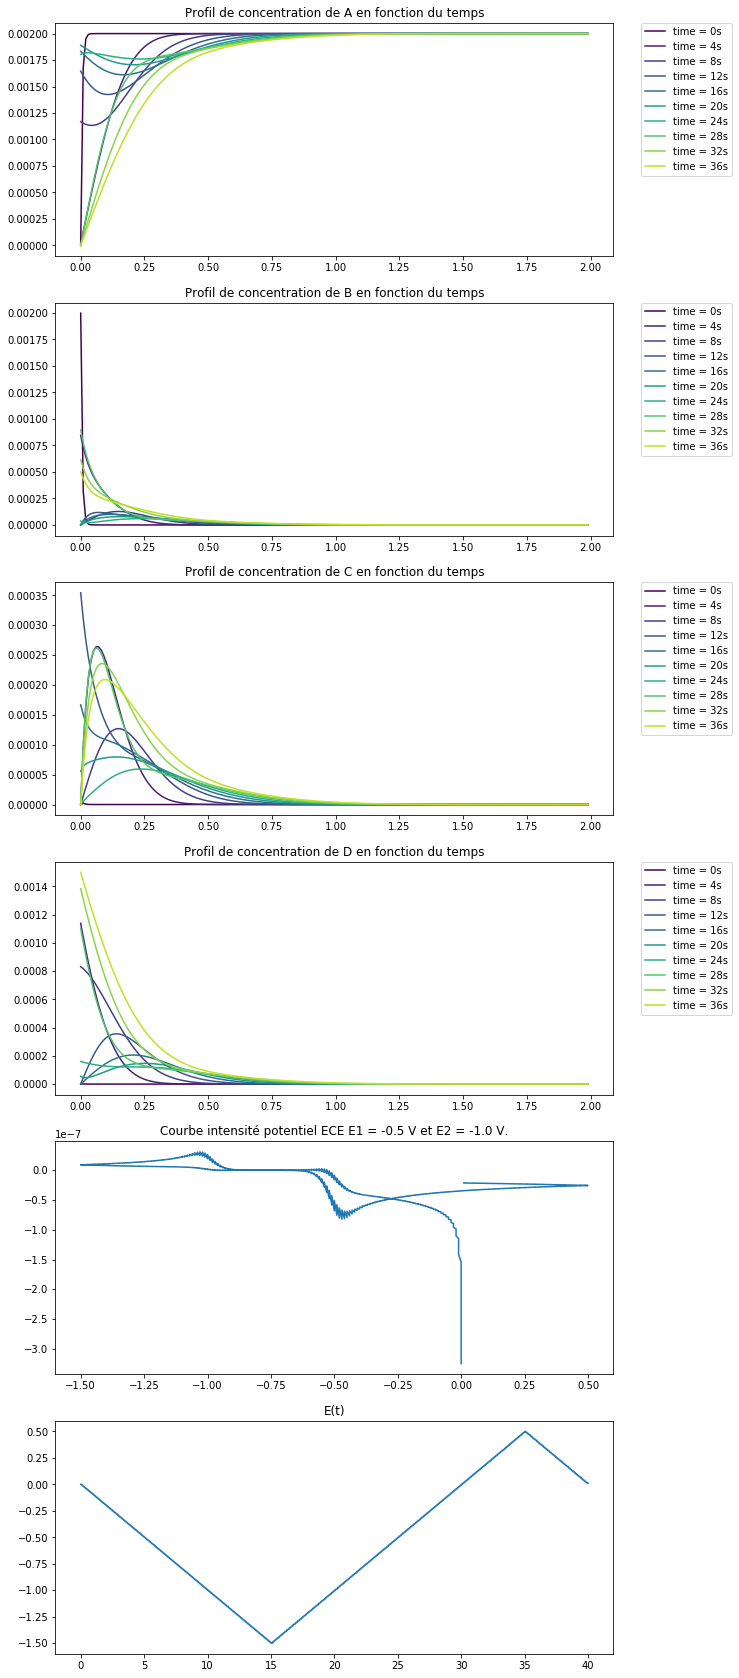

In [2]:
cst_all = default_constants()
I_CSV = main_CSV_ECE_ox(cst_all)

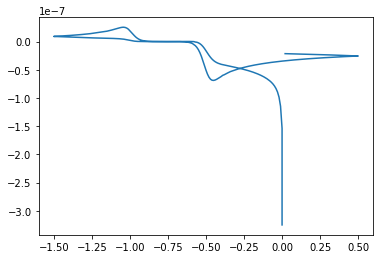

In [3]:
from plot_voltammogram_ECE import extract_expe_like_CSV
E_expe, I_expe = extract_expe_like_CSV(cst_all, I_CSV)
plt.plot(E_expe, I_expe)

In [3]:
from plot_vo

{'R': 8.3145,
 'T': 298.15,
 'F': 96485,
 'S': 1e-06,
 'F_norm': 38.921435528312095,
 'C_a': 0.002,
 'C_b': 0.0,
 'C_c': 0.0,
 'C_d': 0.0,
 'n_sp': 4,
 'E_0_1': -0.5,
 'E_0_2': -1.0,
 'D': 1e-05,
 'n': 1.0,
 'alpha': 0.5,
 'k0': 0.01,
 'kc': 0.001,
 'k_p': 1,
 'k_m': 1,
 'K': 1.0,
 'Nt': 2000,
 'Nx': 200,
 'DM': 0.45,
 'Lambda': 50,
 'L_cuve': 2,
 'Dx': 0.01,
 'Ox': True,
 'E_i': 0.0,
 'E_ox': 0.5,
 'E_red': -1.5,
 'E_SW': 0.05,
 'Delta_E': -0.01,
 'v': 0.1,
 'f': 25,
 'tau': 1.0}